## Лаба2 Задача 6

In [1]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib as mpl
import pandas as pd
import scipy.stats as st
import seaborn as sns
import requests
import math as m
import scipy.stats as st
import itertools
import scipy.stats as st

import librosa
import librosa.display
import IPython.display as ipd

from collections import Counter

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8)

/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/usr/lib/python3/dist-packages/requests/__init__.py:80: RequestsDependencyWarning: urllib3 (1.24.1) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
data = pd.read_csv('speakers_all.csv')

#оставим только нужные данные
#удаляем строки, для которых нет файлов.
x = data.values[:,:]
x= x[x[:,8] == False]
#считаем страны, для которых есть более 30 респондентов.
respondents = Counter(x[:,7])

good_resp = list()
for key in respondents:
    if respondents[key] >= 30:
        good_resp.append(key)

#оставляем респондендов только тех стран, у которых более 30 респондентов.
delete_cond = list()
for i in range(len(x)):
    if x[i,7] not in good_resp:
        delete_cond.append(i)
x = np.delete(x, delete_cond, 0)     
new_data = pd.DataFrame(data = x ,columns=data.columns)

new_data

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,20,5,"addis ababa, ethiopia",amharic1,amharic,female,6,ethiopia,False,NaN,NaN,NaN
1,29,19,"gonder, ethiopia",amharic10,amharic,female,998,ethiopia,False,NaN,NaN,NaN
2,24,17,"addis ababa, ethiopia",amharic11,amharic,female,1129,ethiopia,False,NaN,NaN,NaN
3,26,15,"addis ababa, ethiopia",amharic12,amharic,female,1130,ethiopia,False,NaN,NaN,NaN
4,28,6,"addis ababa, ethiopia",amharic13,amharic,female,1131,ethiopia,False,NaN,NaN,NaN
5,31,12,"addis ababa, ethiopia",amharic14,amharic,male,1515,ethiopia,False,NaN,NaN,NaN
6,23,6,"addis ababa, ethiopia",amharic15,amharic,male,1516,ethiopia,False,NaN,NaN,NaN
7,36,11,"werder, ethiopia",amharic16,amharic,male,1854,ethiopia,False,NaN,NaN,NaN
8,21,9,"addis ababa, ethiopia",amharic17,amharic,male,1906,ethiopia,False,NaN,NaN,NaN
9,20,2,"addis ababa, ethiopia",amharic18,amharic,female,2017,ethiopia,False,NaN,NaN,NaN


In [3]:
#Этот блок обычно выполняется несколько минут!
zc_rates = list()
zc_list = []
for i in range(len(new_data)):
    #подгружаем аудиозапись
    audio_path = './recordings/' + new_data.values[i,3] + '.mp3'
    lev , sr = librosa.load(audio_path, sr=44100)
    zero_crossings = librosa.zero_crossings(lev, pad=False)
    zc_list += [zero_crossings]


In [4]:
zc_l = []
for i in zc_list:
    zc_l += [i[i==True].shape[0]]
zc_l = np.array(zc_l)

In [5]:
zc_l

array([109516,  90438, 105134, ...,  78448,  53400,  51080])

In [6]:
strt_zc_l = (zc_l - np.mean(zc_l))/(zc_l.std())

In [7]:
strt_zc_l

array([ 0.36865341, -0.07416589,  0.26694284, ..., -0.35246569,
       -0.93385461, -0.98770412])

In [8]:
zcs = pd.Series(zc_l)
n_data = new_data.assign(zcs=strt_zc_l)

In [9]:
n_data.head()

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?,Unnamed: 9,Unnamed: 10,Unnamed: 11,zcs
0,20,5,"addis ababa, ethiopia",amharic1,amharic,female,6,ethiopia,False,NaN,NaN,NaN,0.368653
1,29,19,"gonder, ethiopia",amharic10,amharic,female,998,ethiopia,False,NaN,NaN,NaN,-0.074166
2,24,17,"addis ababa, ethiopia",amharic11,amharic,female,1129,ethiopia,False,NaN,NaN,NaN,0.266943
3,26,15,"addis ababa, ethiopia",amharic12,amharic,female,1130,ethiopia,False,NaN,NaN,NaN,-0.381247
4,28,6,"addis ababa, ethiopia",amharic13,amharic,female,1131,ethiopia,False,NaN,NaN,NaN,0.910537


вырежем лишние столбцы

In [10]:
del n_data['birthplace'], n_data['age_onset'], n_data['filename'], n_data['speakerid'], n_data['file_missing?'], n_data['Unnamed: 9'], n_data['Unnamed: 10'],  n_data['Unnamed: 11']

In [11]:
n_data.head()

,age,native_language,sex,country,zcs
0,20,amharic,female,ethiopia,0.368653
1,29,amharic,female,ethiopia,-0.074166
2,24,amharic,female,ethiopia,0.266943
3,26,amharic,female,ethiopia,-0.381247
4,28,amharic,female,ethiopia,0.910537


In [12]:
v = n_data.values
v.shape

(1045, 5)

Теперь начнём сам стат. анализ данных, сначала проверив влияние каждого из наших факторов на zcs

In [13]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [14]:
for i in n_data.axes[1]:
    print(i)
    if i != 'speakerid':
        lm = ols('zcs ~ C(%s)'%i,data=n_data).fit()
        table = sm.stats.anova_lm(lm)
        print(table)

age
             df      sum_sq   mean_sq         F    PR(>F)
C(age)     74.0  116.223156  1.570583  1.640292  0.000782
Residual  970.0  928.776844  0.957502       NaN       NaN
native_language
                       df      sum_sq   mean_sq        F        PR(>F)
C(native_language)   55.0  244.160883  4.439289  5.48232  3.894303e-30
Residual            989.0  800.839117  0.809746      NaN           NaN
sex
              df       sum_sq    mean_sq          F    PR(>F)
C(sex)       1.0    12.434272  12.434272  12.559923  0.000412
Residual  1043.0  1032.565728   0.989996        NaN       NaN
country
                df      sum_sq   mean_sq         F        PR(>F)
C(country)    15.0   80.118529  5.341235  5.696172  2.335536e-11
Residual    1029.0  964.881471  0.937689       NaN           NaN
zcs
              df        sum_sq       mean_sq             F        PR(>F)
C(zcs)    1040.0  1.045000e+03  1.004808e+00  5.660786e+25  6.253323e-52
Residual     4.0  7.100128e-26  1.775032e-26      

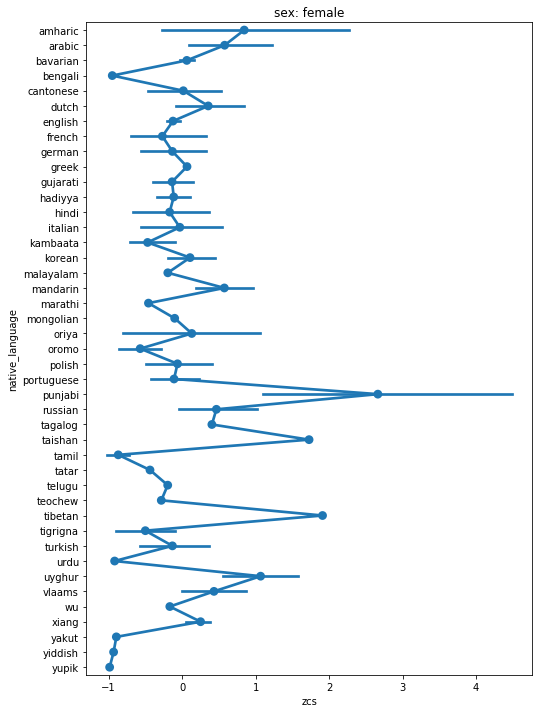

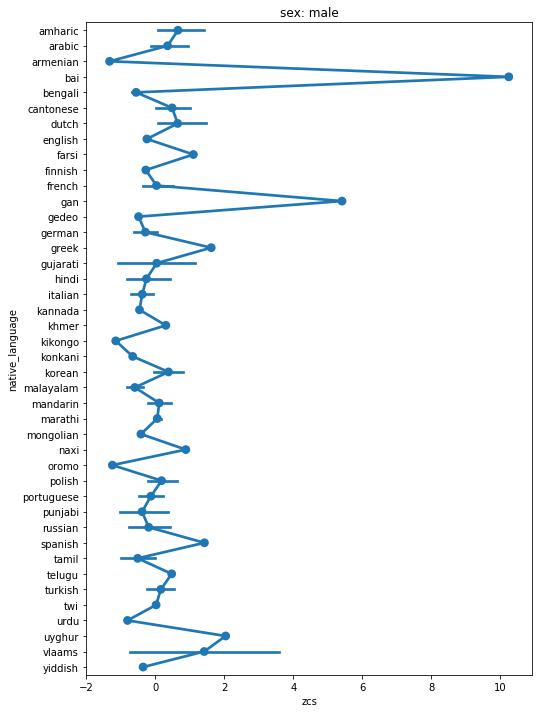

In [15]:
plt.figure(figsize=(8,12))
plt.title('sex: female')
sns.pointplot(x="zcs", y="native_language", data=n_data.loc[data['sex']=='female'])
plt.show()

plt.figure(figsize=(8,12))
plt.title('sex: male')
sns.pointplot(x="zcs", y="native_language", data=n_data.loc[data['sex']=='male'])
plt.show()

график не особо информативен, будем руководствоваться только самим тестом.

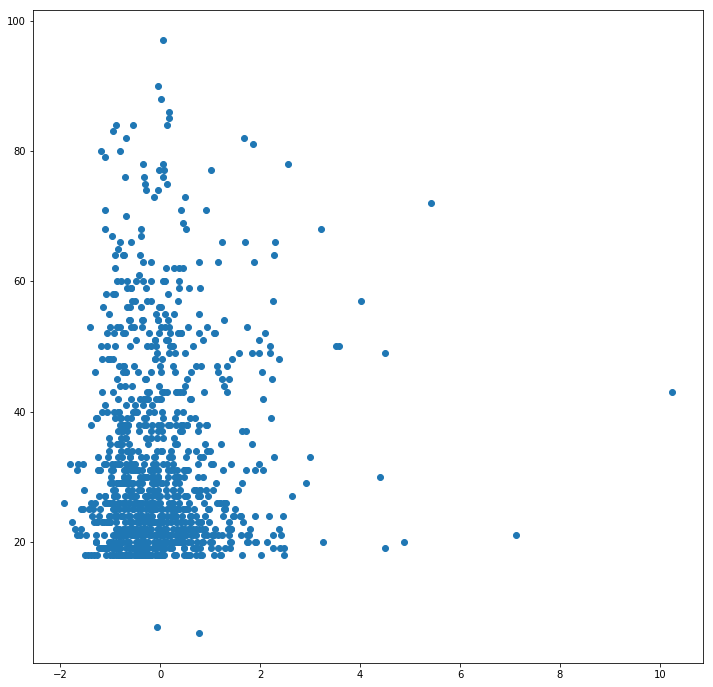

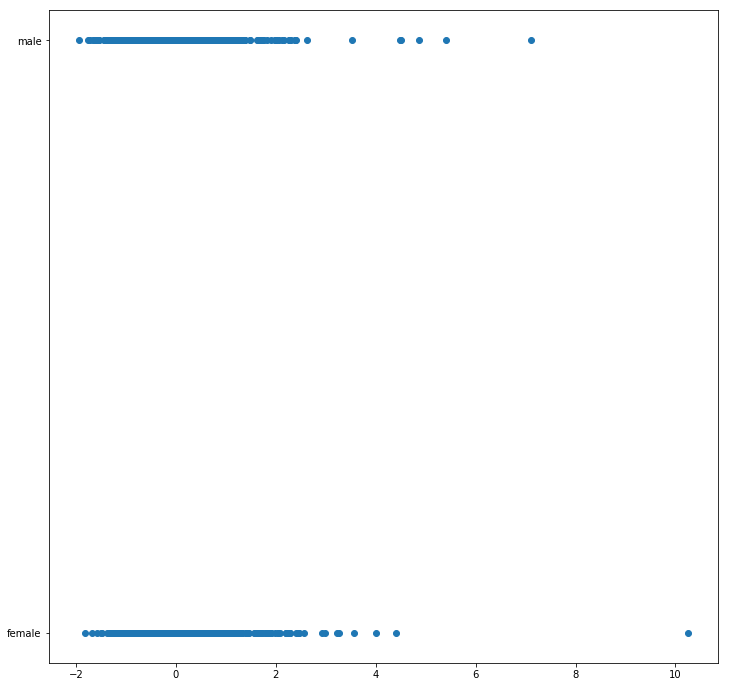

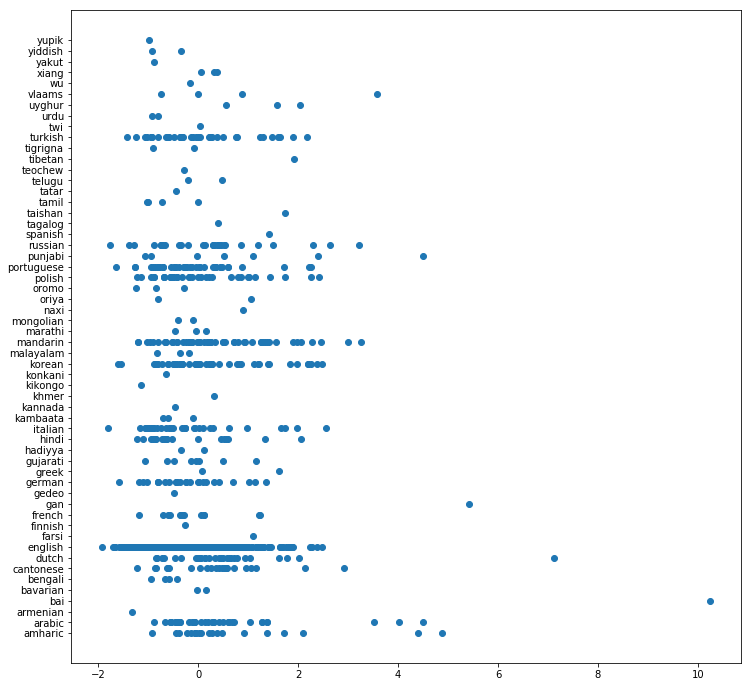

In [16]:
list_of_factors = ['age', 'sex', 'native_language']
for i in list_of_factors:
    plt.figure(figsize=(12,12))
    plt.scatter(n_data['zcs'], n_data[i])
    plt.show()

Не знаю насколько состоятельно отценивать по таких графикам, внешне гетероскедастичности нет.

In [17]:
n_data.to_csv('./n_data.csv')

Признаков слишком много, разобьём например возраст на несколько групп, чтобы заработал критерий.

In [18]:
from copy import deepcopy


nn_data = deepcopy(n_data)
new_age = nn_data['age'].values.astype(np.int32)
new_age = new_age

In [19]:
new_age = np.sort(new_age)
for i in range(200, 801, 200):
    print(new_age[i])

21
24
30
40


Бьём возраста по этим группам

In [20]:
del nn_data['age']
l = []
for i in new_age:
    if i <= 21:
        l += [0]
    if i <= 24 and i > 21:
        l += [1]
    if i <= 30 and i > 24:
        l += [2]
    if i <= 40 and i > 30:
        l += [3]
    if i > 40:
        l += [4]

nn_data = nn_data.assign(age=np.array(l))

In [21]:
lm = ols('zcs ~ C(age)*C(sex)*C(native_language)',data=nn_data).fit()
table = sm.stats.anova_lm(lm, type=1, )
table

,df,sum_sq,mean_sq,F,PR(>F)
C(age),4.0,13.535700,3.383925,4.309051,1.847942e-03
C(sex),1.0,12.016214,12.016214,15.301308,9.813665e-05
C(native_language),55.0,245.086357,4.456116,5.674366,2.034885e-31
C(age):C(sex),4.0,6.302233,1.575558,2.006298,9.157660e-02
C(age):C(native_language),220.0,204.814298,0.930974,1.185492,4.859077e-02
C(sex):C(native_language),55.0,32.399555,0.589083,0.750131,9.107643e-01
C(age):C(sex):C(native_language),220.0,126.274174,0.573974,0.730891,9.977707e-01
Residual,956.0,750.752837,0.785306,NaN,NaN


###  Вывод

Есть небольшое влияние всех факторов самих по себе, а так же есть межфакторное взаимодействие между возрастом и языком и возрастом и полом. Самый сильный фактор - это язык.